In [15]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, fancy_legend, load_mpl_presets, dummy_background_axes
import numpy as np
import vice
import sys
load_mpl_presets()
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=13, releaselevel='final', serial=0)


In [2]:
output = vice.output("../outputs/inside-out/vrad0")
extra = np.genfromtxt("../outputs/inside-out/vrad0_analogdata.out")
output.stars["absz"] = [abs(_) for _ in extra[:,-1][:output.stars.size[0]]]
stars = output.stars.filter("absz", "<=", 0.5)

In [8]:
ZONE_WIDTH = 0.1
def plot_distributions(ax_radial, ax_oh, sample, age_range, radial_range, radial_bins, oh_bins, **kwargs):
    sub = sample.filter(
        "zone_final", ">=", int(radial_range[0] / ZONE_WIDTH)).filter(
        "zone_final", "<=", int(radial_range[1] / ZONE_WIDTH) - 1).filter(
        "age", ">=", age_range[0]).filter(
        "age", "<=", age_range[1])
    sub["rbirth"] = [ZONE_WIDTH * (zone + 0.5) for zone in sub["zone_origin"]]
    hist_kwargs = {
        "weights": sub["mass"],
        "density": True
    }
    rbirth_dist, _ = np.histogram(sub["rbirth"], bins = radial_bins, **hist_kwargs)
    xvals = [(a + b) / 2 for a, b in zip(radial_bins[1:], radial_bins[:-1])]
    ax_radial.plot(xvals, rbirth_dist, **kwargs)
    oh_dist, _ = np.histogram(sub["[o/h]"], bins = oh_bins, **hist_kwargs)
    xvals = [(a + b) / 2 for a, b in zip(oh_bins[1:], oh_bins[:-1])]
    ax_oh.plot(xvals, oh_dist, **kwargs)

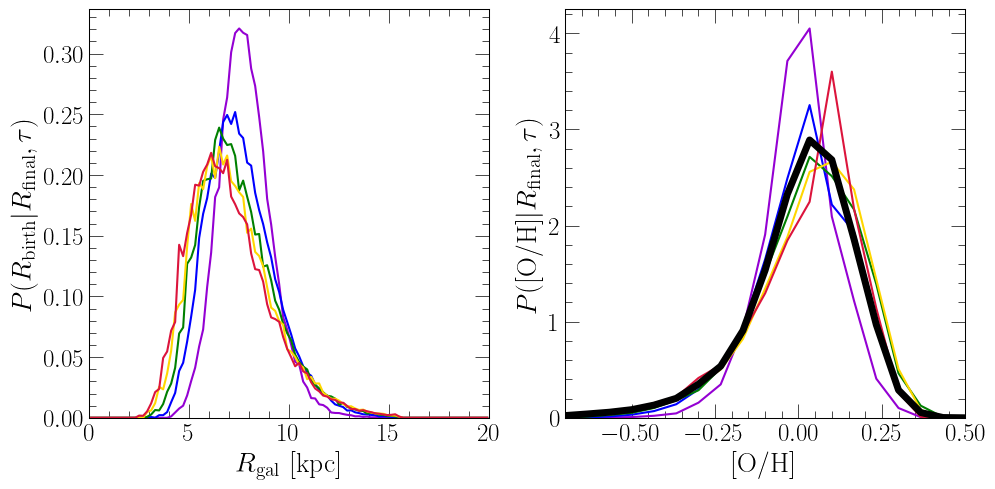

In [12]:
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax1.set_xlabel(r"$R_\text{gal}$ [kpc]")
ax1.set_ylabel(r"$P(R_\text{birth} | R_\text{final}, \tau)$")
ax1.set_xlim([0, 20])
ax2 = fig.add_subplot(122)
ax2.set_xlabel(r"[O/H]")
ax2.set_ylabel(r"$P(\text{[O/H]} | R_\text{final}, \tau)$")
ax2.set_xlim([-0.7, 0.5])

zone_width = 0.1
rgal_bins = np.linspace(0, 20, 101)
rgal_ranges = [3, 5, 7, 9, 11, 13]
oh_bins = np.linspace(-1, 1, 31)
age_bins = [0, 2, 4, 6, 8, 10]
colors = ["darkviolet", "blue", "green", "gold", "crimson"]

# sub = stars.filter("zone_final", ">=", 110).filter("zone_final", "<=", 129)
# for i in range(len(age_bins) - 1):
#     subsub = sub.filter("age", ">=", age_bins[i]).filter("age", "<=", age_bins[i + 1])
#     subsub["rbirth"] = [zone_width * (zone + 0.5) for zone in subsub["zone_origin"]]
#     rbirth_dist, _ = np.histogram(subsub["rbirth"], bins = rgal_bins, weights = subsub["mass"], density = True)
#     xvals = [(a + b) / 2 for a, b in zip(rgal_bins[:-1], rgal_bins[1:])]
#     ax1.plot(xvals, rbirth_dist, c = named_colors()[colors[i]])
#     oh_dist, _ = np.histogram(subsub["[o/h]"], bins = oh_bins, weights = subsub["mass"], density = True)
#     xvals = [(a + b) / 2 for a, b in zip(oh_bins[:-1], oh_bins[1:])]
#     ax2.plot(xvals, oh_dist, c = named_colors()[colors[i]])
for i in range(len(age_bins) - 1):
    kwargs = {"c": named_colors()[colors[i]]}
    plot_distributions(ax1, ax2, stars, age_bins[i:(i + 2)], [7, 9], rgal_bins, oh_bins, **kwargs)
sub = stars.filter("zone_final", ">=", 70).filter("zone_final", "<=", 89)
oh_dist, _ = np.histogram(sub["[o/h]"], bins = oh_bins, weights = sub["mass"], density = True)
xvals = [(a + b) / 2 for a, b in zip(oh_bins[:-1], oh_bins[1:])]
ax2.plot(xvals, oh_dist, c = named_colors()["black"], linewidth = 5)

ax1.set_ylim([0, ax1.get_ylim()[1]])
ax2.set_ylim([0, ax2.get_ylim()[1]])
plt.tight_layout()
plt.show()

/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_58961/1687817108.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


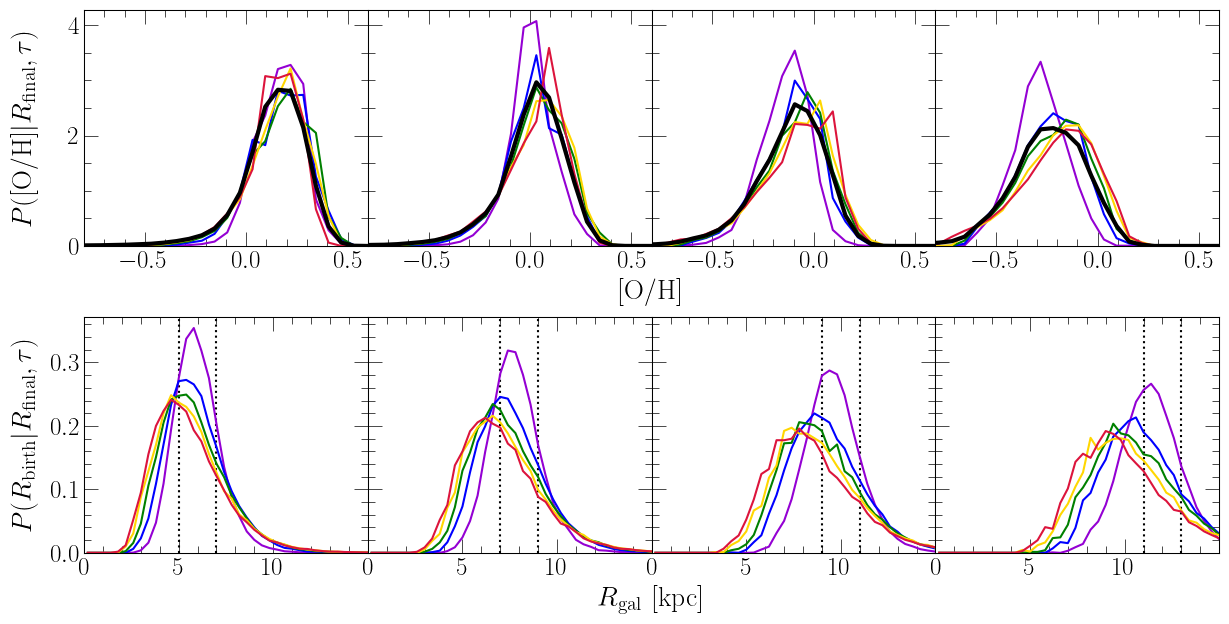

In [44]:
RADIAL_RANGES = [5, 7, 9, 11, 13]
AGE_RANGES = [0, 2, 4, 6, 8, 10]
RADIAL_BINS = np.linspace(0, 20, 51)
OH_BINS = np.linspace(-1.5, 1, 41)
COLORS = ["darkviolet", "blue", "green", "gold", "crimson"]

fig = plt.figure(figsize = (12, 6))
top = []
bottom = []
for i in range(4):
    kwargs = {}
    if i: kwargs["sharey"] = top[0]
    top.append(fig.add_subplot(241 + i, **kwargs))
    top[i].set_xlim([-0.8, 0.6])
    top[i].set_xticks([-0.5, 0, 0.5])
    if i: kwargs["sharey"] = bottom[0]
    bottom.append(fig.add_subplot(245 + i, **kwargs))
    bottom[i].set_xlim([0, 15])
    bottom[i].set_xticks([0, 5, 10])
    bottom[i].set_yticks([0, 0.1, 0.2, 0.3])
    if i:
        plt.setp(top[i].get_yticklabels(), visible = False)
        plt.setp(bottom[i].get_yticklabels(), visible = False)
    else: pass
    top_dummy = fig.add_axes([0.1, 0.1, 0.1, 0.1], zorder = -1000)
    bottom_dummy = fig.add_axes([0.1, 0.1, 0.1, 0.1], zorder = -1000)
    for dummy in [top_dummy, bottom_dummy]:
        plt.setp(dummy.get_xticklabels(), visible = False)
        plt.setp(dummy.get_yticklabels(), visible = False)

for i in range(len(RADIAL_RANGES) - 1):
    kwargs = {
        "c": named_colors()["black"],
        "linestyle": ":"
    }
    bottom[i].axvline(RADIAL_RANGES[i], **kwargs)
    bottom[i].axvline(RADIAL_RANGES[i + 1], **kwargs)
    for j in range(len(AGE_RANGES) - 1):
        plot_distributions(bottom[i], top[i], stars, AGE_RANGES[j:(j + 2)], RADIAL_RANGES[i:(i + 2)],
            RADIAL_BINS, OH_BINS, c = named_colors()[COLORS[j]])
    sub = stars.filter(
        "zone_final", ">=", int(RADIAL_RANGES[i] / ZONE_WIDTH)).filter(
        "zone_final", "<=", int(RADIAL_RANGES[i + 1] / ZONE_WIDTH) - 1)
    oh_dist, _ = np.histogram(sub["[o/h]"], bins = OH_BINS, weights = sub["mass"], density = True)
    xvals = [(a + b) / 2 for a, b in zip(OH_BINS[:-1], OH_BINS[1:])]
    top[i].plot(xvals, oh_dist, c = named_colors()["black"], linewidth = 3)

top[0].set_ylim([0, top[0].get_ylim()[1]])
bottom[0].set_ylim([0, bottom[0].get_ylim()[1]])

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0.3)
top_dummy.set_position([
    top[0].get_position().x0,
    top[0].get_position().y0,
    top[-1].get_position().x1 - top[0].get_position().x0,
    top[0].get_position().y1 - top[0].get_position().y0
])
bottom_dummy.set_position([
    bottom[0].get_position().x0,
    bottom[0].get_position().y0,
    bottom[-1].get_position().x1 - bottom[0].get_position().x0,
    bottom[0].get_position().y1 - bottom[0].get_position().y0
])
top_dummy.set_xlabel("[O/H]", labelpad = 20)
top_dummy.set_ylabel(r"$P(\text{[O/H]} | R_\text{final}, \tau)$", labelpad = 30)
bottom_dummy.set_xlabel(r"$R_\text{gal}$ [kpc]", labelpad = 20)
bottom_dummy.set_ylabel(r"$P(R_\text{birth} | R_\text{final}, \tau)$", labelpad = 30)
plt.show()

There is an effect of the correct sign in that the birth radius shifts inward for older populations at a fixed present day radius. This does imprint on the metallicity distributions conditioned on both age and present day radius in that older populations have a slightly more metal rich mode. However, the effect seems to be stronger in birth radius than metallicity. For example, in the outermost radial bin here (11 - 13 kpc), stars in the oldest age bin tend to be born at 8 -  10 kpc. However, the mode of the MDF for these stars is only ~0.2 dex higher than it is for the youngest stars at this radius.

Intuitively, I expect that this is due to the relatively shallow nature of the abundance gradient in this model. For a gradient of slope -0.06 dex/kpc (my measurement of $\nabla$[O/H] for the bulk population), stars that migrate 5 kpc outward in radius are only 0.3 dex more metal rich than the in-situ stars.

However, one noticeable difference between this model and the h277 distributions $P(R_\text{birth} | R_\text{final}, \tau)$ shown in the bottom panels of Fig. 1 in Johnson et al. (2021) is in the *tails* of the distribution. Here, they are relatively age independent toward high $R$. In h277, it is more of a uniform shift inward; the tails do not match up, and the distribution is more of a uniform inward shift. Nonetheless, much of the effect in the inner Galaxy and out to the solar neighborhood is well reproduced. 9-11 kpc looks good as well, with the exception of the 8-10 Gyr old bin.